<a href="https://colab.research.google.com/github/kayceeprag/Final-data71200/blob/main/Project3Data72000Kelechi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Experiments on Wine Quality Dataset
**Project Three**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install -U scikit-learn==1.4
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

In [ ]:
# Load the dataset
winedata = pd.read_csv('https://raw.githubusercontent.com/kayceeprag/Kelechi-Iwuagwu/main/winequality-white.csv', sep=';')

print(winedata)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

#Spliting the data into training and testing sets

In [ ]:
train_set, test_set = train_test_split(winedata, test_size=0.2, random_state=42)

#Verify the splits

print(f'Training set size: {len(train_set)}')
print(f'Testing set size: {len(test_set)}')

Training set size: 3918
Testing set size: 980


In [ ]:
# Define the features (X) and the target (y)
X = winedata.drop('quality', axis=1)
y = winedata['quality']

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# StandardScaler the data by initializing
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3918, 11)
X_test shape: (980, 11)
y_train shape: (3918,)
y_test shape: (980,)


Scale the data

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now you can use X_train_scaled and X_test_scaled for model training and evaluation

 Encode categorical variables, (not needed for this dataset as it's all numerical)

#Step 2 PCA for feature selection.

In [ ]:
# Initialize PCA retain 95% of variance
pca = PCA(n_components=0.95)

# Fit PCA on the scaled training data and transform it
X_train_pca = pca.fit_transform(X_train_scaled)

# Number of components to retain 95% variance
n_components = pca.n_components_
print(f"Number of components to retain 95% variance: {n_components}")

# Transform the test data using the same PCA model
X_train_pca = pca.transform(X_train_scaled)

# Initialize the best-performing model (Random Forest)
rf = RandomForestClassifier(random_state=42)

# Fit the model on the reduced training data
rf.fit(X_train_pca, y_train)



Number of components to retain 95% variance: 9
Random Forest - PCA Data: Precision: 0.6570974103927286, Recall: 0.65, F1: 0.6389940366293225


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.2937752  0.1427297  0.11135372 0.09285886 0.0878651  0.08501579
 0.06558823 0.05457082 0.03803743]


In [ ]:
# Transform the test data using the same PCA model
X_test_pca = pca.transform(X_test_scaled)

# Make predictions on the test data
y_pred = rf.predict(X_test_pca)

# Evaluate model performance
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Random Forest - PCA Data: Precision: {precision}, Recall: {recall}, F1: {f1}")

Random Forest - PCA Data: Precision: 0.6570974103927286, Recall: 0.65, F1: 0.6389940366293225


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Project Two Random Forest - Precision: 0.5939632457740857, Recall: 0.47557169221258566, F1: 0.5154905156899828.

Trained Random Forest:
Precision: 0.657 - This means that out % of all the instances your model predicted as positive (belonging to a certain wine quality class), 65.7% of them were correct.
Recall: 0.65 - This indicates that your model correctly identified 65% of all the actual positive instances in the dataset.
F1-Score: 0.639 - This is a harmonic mean of precision and recall, providing a balanced assessment of the model's performance. An F1-score closer to 1 indicates better performance.

#Step 3: Apply clustering algorithms

K-Means Clustering

In [ ]:
def evaluate_clustering(y_true, y_pred, X):
    ari = adjusted_rand_score(y_true, y_pred)
    silhouette = silhouette_score(X, y_pred)
    return ari, silhouette

Training data cluster assignments:
 [0 0 2 ... 1 0 1]
Testing data cluster assignments:
 [2 2 0 1 0 1 1 0 2 2 1 2 0 0 2 1 2 0 1 1 2 0 1 2 2 1 2 0 2 2 0 1 1 1 1 0 0
 2 1 2 0 0 2 2 1 2 0 0 2 0 0 2 0 2 0 0 2 2 2 2 1 2 1 2 2 1 2 2 2 2 0 2 1 1
 1 1 2 1 1 1 1 2 1 0 2 2 1 0 2 1 1 1 2 0 2 2 1 1 0 2 2 2 2 2 0 0 0 0 0 1 1
 2 2 1 2 0 1 0 1 0 2 2 2 1 0 1 0 1 0 2 2 2 0 1 1 0 2 0 2 0 0 2 2 2 2 2 1 1
 0 0 1 2 2 0 2 2 2 0 0 2 2 1 0 2 1 1 1 2 0 2 0 1 0 0 0 1 1 1 2 0 2 1 0 2 1
 2 0 1 1 2 2 1 0 2 2 1 0 0 0 2 2 1 1 2 0 1 2 0 0 2 1 2 0 2 1 1 2 1 0 0 2 2
 0 1 0 0 0 2 2 2 1 1 0 2 0 0 2 0 1 1 0 0 1 1 2 1 1 0 1 1 0 1 0 1 2 2 0 0 1
 0 0 0 1 1 0 0 1 2 1 0 0 0 0 2 1 2 0 0 0 2 0 0 0 2 1 1 0 0 1 0 0 0 2 2 2 0
 1 0 0 1 2 2 1 2 2 1 0 0 1 1 1 0 2 1 2 2 0 2 1 0 1 1 1 1 1 1 1 1 2 0 1 0 0
 2 2 1 1 1 2 2 2 0 0 1 0 2 0 2 1 0 2 2 2 2 1 0 0 2 2 2 1 1 0 1 2 2 2 2 0 0
 0 2 0 1 2 1 1 2 2 0 0 1 1 2 2 1 2 0 2 0 0 1 2 2 0 0 2 2 0 2 0 1 1 0 2 0 1
 1 2 2 1 0 0 1 1 2 2 1 2 0 0 1 1 0 0 2 0 1 2 1 1 2 0 1 1 2 0 0 0 2 2 1 0 2
 1 1 2 0 1 

<ipython-input-52-9aac6a3700b0>:24: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test_pred, cmap='viridis', marker='x', edgecolor='k', s=50, label='Test')


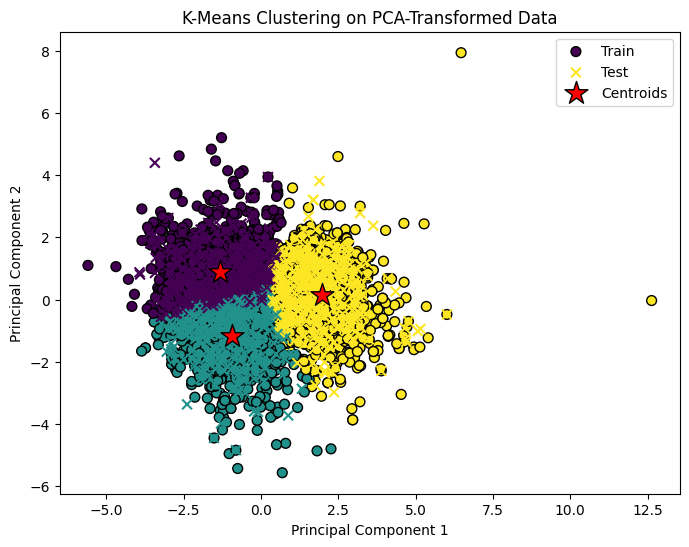

In [ ]:
# instantiate an instance of k-Means
kmeans = KMeans(n_clusters=3, random_state=42)

# fit the model to the training data
kmeans.fit(X_train_pca)

# Predict cluster labels for the training data
y_train_pred = kmeans.predict(X_train_pca)

# Predict cluster labels for the testing data
y_test_pred = kmeans.predict(X_test_pca)

# get assignments (labels)
# Print the cluster assignments for training data
print("Training data cluster assignments:\n", y_train_pred)

# Print the cluster assignments for testing data
print("Testing data cluster assignments:\n", y_test_pred)

# plot a scatter matrix of the results

plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_pred, cmap='viridis', marker='o', edgecolor='k', s=50, label='Train')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test_pred, cmap='viridis', marker='x', edgecolor='k', s=50, label='Test')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='*', edgecolor='k', label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('K-Means Clustering on PCA-Transformed Data')
plt.show()


In [ ]:
# Elbow method to determine the optimal number of clusters

inertia = []
cluster_range = range(1, 11)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    inertia.append(kmeans.inertia_)

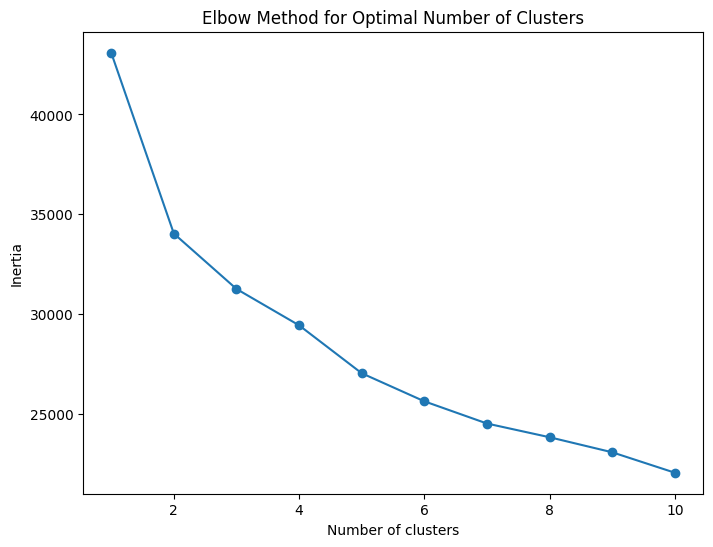

In [ ]:
# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

In [ ]:
# K-Means on original data
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
y_train_pred_kmeans = kmeans.fit_predict(X_train_scaled)

# K-Means on PCA data
y_train_pred_kmeans_pca = kmeans.fit_predict(X_train_pca)

In [ ]:
# Evaluate
ari_kmeans, silhouette_kmeans = evaluate_clustering(y_train, y_train_pred_kmeans, X_train_scaled)
ari_kmeans_pca, silhouette_kmeans_pca = evaluate_clustering(y_train, y_train_pred_kmeans_pca, X_train_pca)

print(f"K-Means ARI: {ari_kmeans}, Silhouette: {silhouette_kmeans}")
print(f"K-Means with PCA ARI: {ari_kmeans_pca}, Silhouette: {silhouette_kmeans_pca}")

K-Means ARI: 0.04619583150495772, Silhouette: 0.145997814038204
K-Means with PCA ARI: 0.04621236892416446, Silhouette: 0.15134619648194542


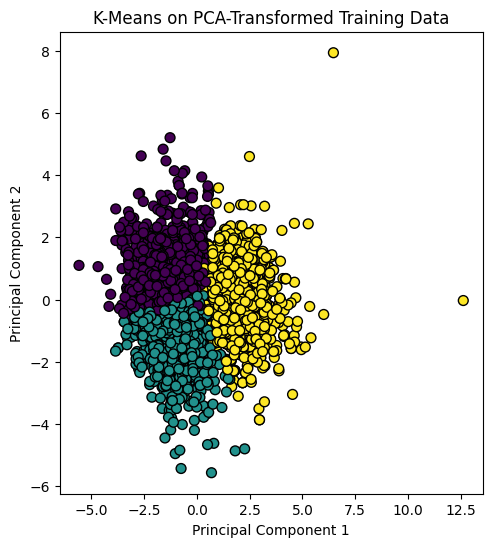

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_pred, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('K-Means on PCA-Transformed Training Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()

Agglomerative Clustering

In [ ]:
# Agglomerative Clustering on original data
agglo = AgglomerativeClustering(n_clusters=optimal_clusters)
y_train_pred_agglo = agglo.fit_predict(X_train_scaled)

# Agglomerative Clustering on PCA trained data
y_train_pred_agglo_pca = agglo.fit_predict(X_train_pca)

In [ ]:
# Evaluate
ari_agglo, silhouette_agglo = evaluate_clustering(y_train, y_train_pred_agglo, X_train_scaled)
ari_agglo_pca, silhouette_agglo_pca = evaluate_clustering(y_train, y_train_pred_agglo_pca, X_train_pca)

print(f"Agglomerative Clustering ARI: {ari_agglo}, Silhouette: {silhouette_agglo}")
print(f"Agglomerative Clustering with PCA ARI: {ari_agglo_pca}, Silhouette: {silhouette_agglo_pca}")

Agglomerative Clustering ARI: 0.021009761618346796, Silhouette: 0.0812005379706865
Agglomerative Clustering with PCA ARI: 0.03893680539818591, Silhouette: 0.08859197832437134


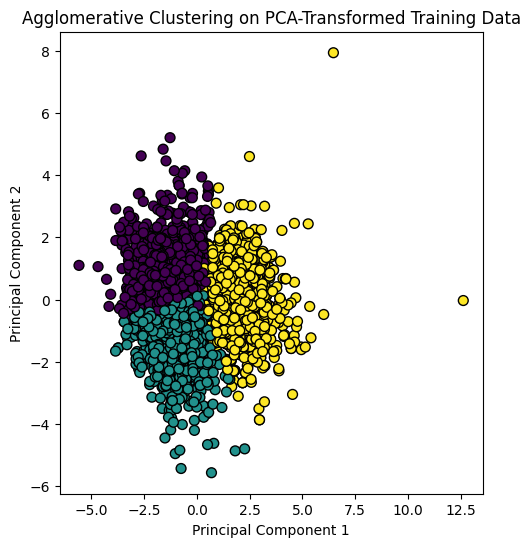

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_pred, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('Agglomerative Clustering on PCA-Transformed Training Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()

DBSCAN

In [ ]:
# DBSCAN on original data
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_train_pred_dbscan = dbscan.fit_predict(X_train_scaled)

# DBSCAN on PCA data
y_train_pred_dbscan_pca = dbscan.fit_predict(X_train_pca)

DBSCAN ARI: 0.002059269585711343, Silhouette: -0.3490474664456976
DBSCAN with PCA ARI: 0.0014971015475033886, Silhouette: -0.3737893327012459


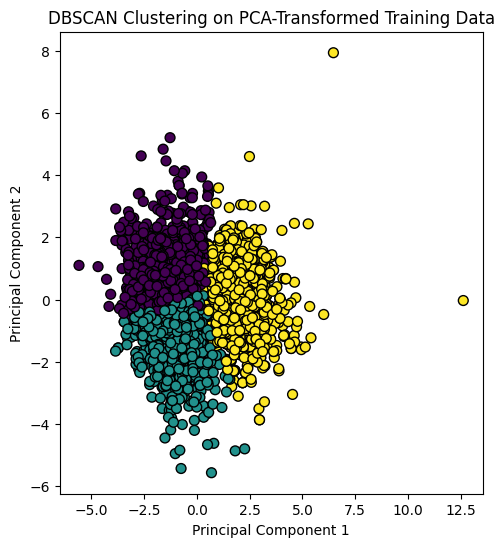

In [ ]:
# Evaluate
ari_dbscan, silhouette_dbscan = evaluate_clustering(y_train, y_train_pred_dbscan, X_train_scaled)
ari_dbscan_pca, silhouette_dbscan_pca = evaluate_clustering(y_train, y_train_pred_dbscan_pca, X_train_pca)

print(f"DBSCAN ARI: {ari_dbscan}, Silhouette: {silhouette_dbscan}")
print(f"DBSCAN with PCA ARI: {ari_dbscan_pca}, Silhouette: {silhouette_dbscan_pca}")

# Plot the clusters for the training data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_pred, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('DBSCAN Clustering on PCA-Transformed Training Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()